In [ ]:
"""
    Ho va Ten: Bui Thi Thanh Xuan
    MSSV: 19110522
"""

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import warnings

from sklearn import svm
from sklearn.svm import SVC

warnings.filterwarnings('ignore')

In [ ]:
#Đọc file data_3.txt
data_3 = np.loadtxt("https://raw.githubusercontent.com/huynhthanh98/ML/ML-2022/lab-07/data_3.txt")

# Tạo training set x và label y
X_3 = data_3[:,0:2]
y_3 = data_3[:,2]

In [ ]:
#Đọc file data_3.txt
data_4 = np.loadtxt("https://raw.githubusercontent.com/huynhthanh98/ML/ML-2022/lab-07/data_4.txt")

# Tạo training set x và label y
X_4 = data_4[:,0:2]
y_4 = data_4[:,2]

In [ ]:
def display_data_and_boundary(x,y,pred_fn):  
    # Determine the x1- and x2- limits of the plot
    x1min = min(x[:,0]) - 1
    x1max = max(x[:,0]) + 1
    x2min = min(x[:,1]) - 1
    x2max = max(x[:,1]) + 1
    plt.xlim(x1min,x1max)
    plt.ylim(x2min,x2max)
    # Plot the data points
    k = int(max(y)) + 1
  
    cols = ['ro', 'k^', 'b*','gx']
    
    for label in range(k):
        plt.plot(x[(y==label),0], x[(y==label),1], cols[label],  markersize=8)
        
    # Construct a grid of points at which to evaluate the classifier
    grid_spacing = 0.05
    xx1, xx2 = np.meshgrid(np.arange(x1min, x1max, grid_spacing), np.arange(x2min, x2max, grid_spacing))
    grid = np.c_[xx1.ravel(), xx2.ravel()]
    Z = np.array([pred_fn(pt) for pt in grid])
    # Show the classifier's boundary using a color plot
    Z = Z.reshape(xx1.shape)
    plt.pcolormesh(xx1, xx2, Z, cmap=plt.cm.Pastel1, vmin=0, vmax=k)
    plt.show()

## **1. Thử chạy SVM trên 2 files data_3.txt và data_4.txt với C=[0.1, 1.0, 10.0, 100.0]**

Lưu ý đối với việc dùng các kernels như linear, polynomial ta chỉ cần quan tâm đến tham số C. Còn kernel rbf ta sẽ quan tâm thêm đến tham số.

Do lưu ý này, nên chỉ dùng kernel linear với các C khác nhau trên data_3 và data_4. Còn dùng kernel rbf với các gamma khác nhau nhưng cùng một C = 1 trên data_3 và data_4.

### SVM với data_3 với kernel linear

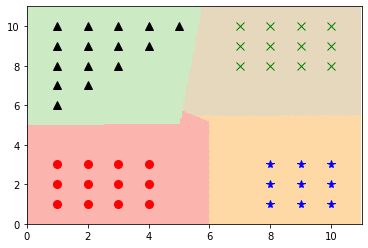

In [ ]:
# Train SVM với kernel linear với C = 0.1
clf_31 = SVC(C = 0.1,kernel="linear")
clf_31.fit(X_3,y_3)
pred_31 = lambda p: clf_31.predict(p.reshape(1,-1))
display_data_and_boundary(X_3,y_3,pred_31)

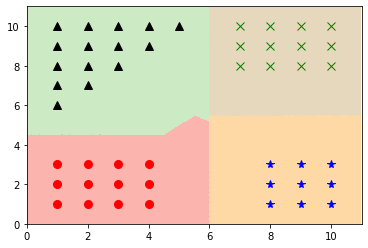

In [ ]:
# Train SVM với kernel linear với C = 1.0
clf_32 = SVC(C = 1.0,kernel="linear")
clf_32.fit(X_3,y_3)
pred_32 = lambda p: clf_32.predict(p.reshape(1,-1))
display_data_and_boundary(X_3,y_3,pred_32)

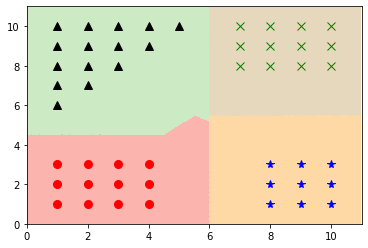

In [ ]:
# Train SVM với kernel linear với C = 10.0
clf_33 = SVC(C = 10.0,kernel="linear")
clf_33.fit(X_3,y_3)
pred_33 = lambda p: clf_33.predict(p.reshape(1,-1))
display_data_and_boundary(X_3,y_3,pred_33)

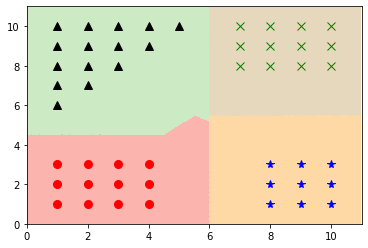

In [ ]:
# Train SVM với kernel linear với C = 100.0
clf_34 = SVC(C = 100.0,kernel="linear")
clf_34.fit(X_3,y_3)
pred_34 = lambda p: clf_34.predict(p.reshape(1,-1))
display_data_and_boundary(X_3,y_3,pred_34)

**Nhận xét:** với 4 hình ở trên, với C = 0.1, 1, 10, 100 thì các điểm dữ liệu được phân loại rất tối, không có điểm dữ liệu nào lộn phân qua lớp khác. 

Điều này không đồng nghĩa với việc chọn C nào cũng như nhau. Riêng đối với data này quá ít sample nên không thấy được sự thay đổi khi điều chỉnh C. 

### SVM với data_3 với kernel rbf (C = 1)

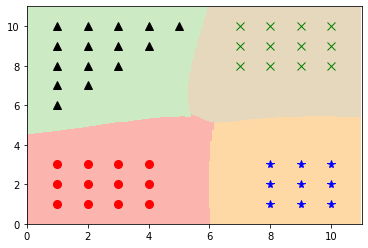

In [ ]:
# Train SVM với kernel rbf với C = 1 và gamma = 0.1
clf_rbf_31 = SVC(C = 1.0,kernel="rbf", gamma = 0.1)
clf_rbf_31.fit(X_3,y_3)
pred_rbf_31 = lambda p: clf_rbf_31.predict(p.reshape(1,-1))
display_data_and_boundary(X_3,y_3,pred_rbf_31)

- gamma = 0.1: Biểu đồ cho thây ranh giới giữa các lớp tốt, phân chia tốt giữa các lớp rõ ràng, không có điểm dữ liệu nào lọt qua ranh giới khác. Vậy cho thấy gamma ở mức trung bình (giá trị trung gian) không quá thấp, cũng không quá cao.  

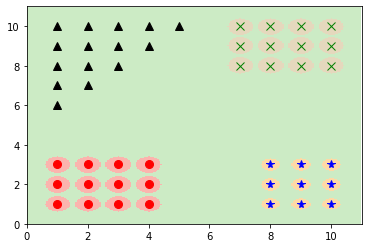

In [ ]:
# Train SVM với kernel rbf với C = 1.0 và gamma = 10.0
clf_rbf_33 = SVC(C = 1.0,kernel="rbf", gamma = 10)
clf_rbf_33.fit(X_3,y_3)
pred_rbf_33 = lambda p: clf_rbf_33.predict(p.reshape(1,-1))
display_data_and_boundary(X_3,y_3,pred_rbf_33)

- gamma = 10.0: Ranh giới quyết định gần như hoàn toàn phụ thuộc vào các điểm dữ liệu riêng lẻ, tạo ra các “islands”. Dữ liệu này rõ ràng đã bị overfit.

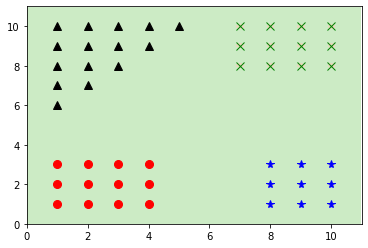

In [ ]:
# Train SVM với kernel rbf với C = 1.0 và gamma = 100.0
clf_rbf_34 = SVC(C = 1.0,kernel="rbf", gamma = 100)
clf_rbf_34.fit(X_3,y_3)
pred_rbf_34 = lambda p: clf_rbf_34.predict(p.reshape(1,-1))
display_data_and_boundary(X_3,y_3,pred_rbf_34)

- gamma = 100.0: dữ liệu không có sự phân lớp, nó cùng nằm trong một lớp xanh lá cây. Điều này cho thấy độ chính xác của mô hình giảm xuống với giá trị gamma ngày càng tăng

### SVM với data_4 với kernel linear

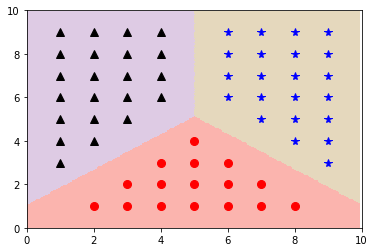

In [ ]:
# Train SVM với kernel linear với C = 0.1
clf_41 = SVC(C = 0.1,kernel="linear")
clf_41.fit(X_4,y_4)
pred_41 = lambda p: clf_41.predict(p.reshape(1,-1))
display_data_and_boundary(X_4,y_4,pred_41)

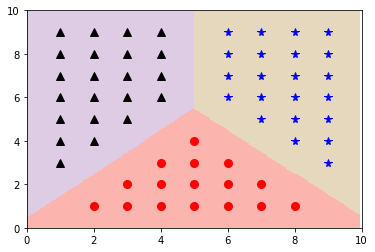

In [ ]:
# Train SVM với kernel linear với C = 1.0
clf_42 = SVC(C = 1.0,kernel="linear")
clf_42.fit(X_4,y_4)
pred_42 = lambda p: clf_42.predict(p.reshape(1,-1))
display_data_and_boundary(X_4,y_4,pred_42)

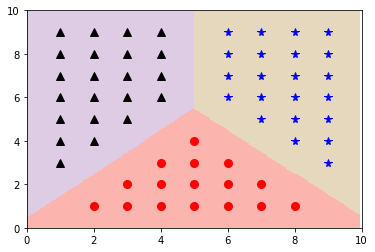

In [ ]:
# Train SVM với kernel linear với C = 10.0
clf_43 = SVC(C = 10.0 ,kernel="linear")
clf_43.fit(X_4,y_4)
pred_43 = lambda p: clf_43.predict(p.reshape(1,-1))
display_data_and_boundary(X_4,y_4,pred_43)

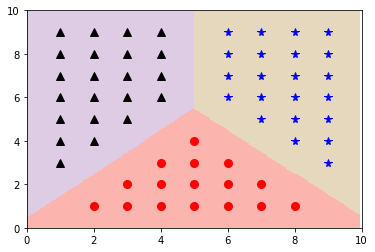

In [ ]:
# Train SVM với kernel linear với C = 100.0
clf_44 = SVC(C = 100.0,kernel="linear")
clf_44.fit(X_4,y_4)
pred_44 = lambda p: clf_44.predict(p.reshape(1,-1))
display_data_and_boundary(X_4,y_4,pred_44)

**Nhận xét:** 

Cũng như data_3 thì data_4 này cũng không có gì thay đổi khi thay đổi C = [0.1, 1.0, 10.0. 100.0] thì các điểm dữ liệu được phân loại rất tối, không có điểm dữ liệu nào lộn phân qua lớp khác.



### SVM với data_4 với kernel rbf

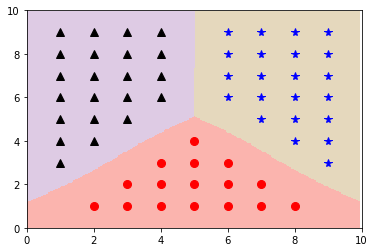

In [ ]:
# Train SVM với kernel rbf với C = 1.0 và gamma = 0.1
clf_rbf_41 = SVC(C = 1.0 ,kernel="rbf", gamma = 0.1)
clf_rbf_41.fit(X_4,y_4)
pred_rbf_41 = lambda p: clf_rbf_41.predict(p.reshape(1,-1))
display_data_and_boundary(X_4,y_4,pred_rbf_41)

- gamma = 0.1: Biểu đồ cho thây ranh giới giữa các lớp tốt, phân chia tốt giữa các lớp rõ ràng, không có điểm dữ liệu nào lọt qua ranh giới khác. Vậy cho thấy gamma ở mức trung bình (giá trị trung gian) không quá thấp, cũng không quá cao.

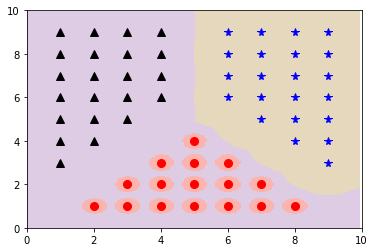

In [ ]:
# Train SVM với kernel rbf với C = 1.0 và gamma = 10.0
clf_rbf_43 = SVC(C = 1.0,kernel="rbf", gamma = 10.0)
clf_rbf_43.fit(X_4,y_4)
pred_rbf_43 = lambda p: clf_rbf_43.predict(p.reshape(1,-1))
display_data_and_boundary(X_4,y_4,pred_rbf_43)

- gamma = 10.0: Ranh giới quyết định gần như hoàn toàn phụ thuộc vào các điểm dữ liệu riêng lẻ, tạo ra các “islands”. Dữ liệu này rõ ràng đã bị overfit.

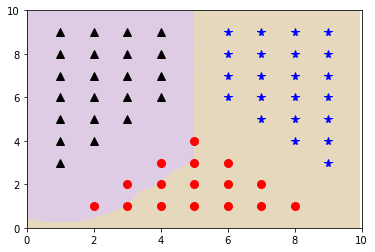

In [ ]:
# Train SVM với kernel rbf với C = 1.0 và gamma = 100.0
clf_rbf_44 = SVC(C = 1.0,kernel="rbf", gamma = 100.0)
clf_rbf_44.fit(X_4,y_4)
pred_rbf_44 = lambda p: clf_rbf_44.predict(p.reshape(1,-1))
display_data_and_boundary(X_4,y_4,pred_rbf_44)

- gamma = 100.0: Dữ liệu phân bố lộn xộn, data có 3 labels nhưng chỉ được phân chia thành 2 ranh giới . Điều này cho thấy độ chính xác của mô hình giảm xuống với giá trị gamma ngày càng tăng.

## **2. Nhận xét với từng C khác nhau thì mô hình thay đổi như thế nào**

note: em chỉ ghi lại các ý ở trên

Do số sample của 2 data quá thấp nên: 

Với kernel là linear ở data_3:

Nhận xét: với 4 hình ở trên, với C = 0.1, 1, 10, 100 thì các điểm dữ liệu được phân loại rất tối, không có điểm dữ liệu nào lộn phân qua lớp khác.

---
Với kernel là linear ở data_4:
Cũng như data_3 thì data_4 này cũng không có gì thay đổi khi thay đổi C = [0.1, 1.0, 10.0. 100.0] thì các điểm dữ liệu được phân loại rất tối, không có điểm dữ liệu nào lộn phân qua lớp khác.

Điều này không đồng nghĩa với việc chọn C nào cũng như nhau. Riêng đối với data này quá ít sample nên không thấy được sự thay đổi khi điều chỉnh C.

## **3. Nêu lợi và hại khi tăng gamma và giảm gamma**

note: em chỉ ghi lại các ý ở trên

Với kernel là rbf ở data_3:
- gamma = 0.1: Biểu đồ cho thây ranh giới giữa các lớp tốt, phân chia tốt giữa các lớp rõ ràng, không có điểm dữ liệu nào lọt qua ranh giới khác. Vậy cho thấy gamma ở mức trung bình (giá trị trung gian) không quá thấp, cũng không quá cao.  
- gamma = 10.0: Ranh giới quyết định gần như hoàn toàn phụ thuộc vào các điểm dữ liệu riêng lẻ, tạo ra các “islands”. Dữ liệu này rõ ràng đã bị overfit. 
- gamma = 100.0: dữ liệu không có sự phân lớp, nó cùng nằm trong một lớp xanh lá cây. Điều này cho thấy độ chính xác của mô hình giảm xuống với giá trị gamma ngày càng tăng. 


---
Với kernel là linear ở data_4:
- gamma = 0.1: Biểu đồ cho thây ranh giới giữa các lớp tốt, phân chia tốt giữa các lớp rõ ràng, không có điểm dữ liệu nào lọt qua ranh giới khác. Vậy cho thấy gamma ở mức trung bình (giá trị trung gian) không quá thấp, cũng không quá cao.  
- gamma = 10.0: Ranh giới quyết định gần như hoàn toàn phụ thuộc vào các điểm dữ liệu riêng lẻ, tạo ra các “islands”. Dữ liệu này rõ ràng đã bị overfit. 
- gamma = 100.0: Dữ liệu phân bố lộn xộn, data có 3 labels nhưng chỉ được phân chia thành 2 ranh giới . Điều này cho thấy độ chính xác của mô hình giảm xuống với giá trị gamma ngày càng tăng. 

**`Tổng kết: `**

Dựa vào data trong bài em có vài nhận xét sau: 

- Việc lựa chọn gamma đối với kernel rbf là rất quan trọng:
- Khi gamma được lựa chọn ở mức không quá cao cũng không quá thấp thì miền quyết định rộng, phân lớp rõ hơn.
- Khi lựa chọn gamma ở mức quá cao sẽ làm miền quyết định gần như fit vào các điểm dữ liệu.